# 키워드 빈도 그래프와 워드클라우드

## 키워드 빈도 그래프

NLTK는 저작권이 만료된 영어 소설들을 제공하는 구텐베르크(Gutenberg) 프로젝트의 일부 책들을 텍스트마이닝 연습용으로 제공  
이 중 루이스 캐럴의 '이상한 나라의 앨리스'로 키워드 빈도 시각화

In [1]:
import nltk
nltk.download('gutenberg')

from nltk.corpus import gutenberg
file_names = gutenberg.fileids() #파일 제목을 읽어온다.
print(file_names)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [2]:
doc_alice = gutenberg.open('carroll-alice.txt').read()

print('#Num of characters used:', len(doc_alice)) #사용된 문자의 수
print('#Text sample:')
print(doc_alice[:500]) #앞의 500자만 출력

#Num of characters used: 144395
#Text sample:
[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


### 토큰화

In [3]:
from nltk.tokenize import word_tokenize

tokens_alice = word_tokenize(doc_alice) #토큰화 실행

print('#Num of tokens used:', len(tokens_alice))
print('#Token sample:')
print(tokens_alice[:20])

#Num of tokens used: 33493
#Token sample:
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning']


### 토큰들의 어간 추출

In [4]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

stem_tokens_alice = [stemmer.stem(token) for token in tokens_alice] #모든 토큰에 대해 스테밍 실행
print('#Num of tokens after stemming:', len(stem_tokens_alice))
print('#Token sample:')
print(stem_tokens_alice[:20])

#Num of tokens after stemming: 33493
#Token sample:
['[', 'alic', "'s", 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', '1865', ']', 'chapter', 'i', '.', 'down', 'the', 'rabbit-hol', 'alic', 'wa', 'begin']


### 토큰들의 기본형 추출
어간 추출 결과와 비교

In [5]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lem_tokens_alice = [lemmatizer.lemmatize(token) for token in tokens_alice] #모든 토큰에 대해 스테밍 실행, 디폴트는 명사
print('#Num of tokens after lemmatization:', len(lem_tokens_alice))
print('#Token sample:')
print(lem_tokens_alice[:20])

#Num of tokens after lemmatization: 33493
#Token sample:
['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'wa', 'beginning']


### 정규표현식을 이용한 토큰화
'[' 나 ']' 같은 부호, 2글자 이하의 키워드를 제외함 => 토큰 수 현저히 감소  
어떤 부호를 포함하거나 제외하는 건 분석 목적을 고려하여 결정

In [6]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']{3,}")   # 알파벳이나 숫자, _, ' 가 3글자 이상 나오는 패턴을 토큰으로 봄

reg_tokens_alice = tokenizer.tokenize(doc_alice.lower())
print('#Num of tokens with RegexpTokenizer:', len(reg_tokens_alice))
print('#Token sample:')
print(reg_tokens_alice[:20])

#Num of tokens with RegexpTokenizer: 21616
#Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'get', 'very', 'tired', 'sitting', 'her', 'sister']


### 정규표현식 토큰화 결과에서 불용어 제거하고 시각화
그래프를 이용한 시각화이므로 키워드를 알아보기 쉽도록 어간 추출은 하지 않음

In [7]:
from nltk.corpus import stopwords #일반적으로 분석대상이 아닌 단어들
english_stops = set(stopwords.words('english')) #반복이 되지 않도록 set으로 변환

result_alice = [word for word in reg_tokens_alice if word not in english_stops] #stopwords를 제외한 단어들만으로 list를 생성

print('#Num of tokens after stopword elimination:', len(result_alice))
print('#Token sample:')
print(result_alice[:20])

#Num of tokens after stopword elimination: 12999
#Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book']


### 딕셔너리로 키워드별 빈도 계산 후 빈도순으로 정렬

In [10]:
alice_word_count = dict()
for word in result_alice:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1   # 

print('#Num of used words:', len(alice_word_count))
  
sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)

print("#Top 20 high frequency words:")
for key in sorted_word_count[:20]: #빈도수 상위 20개의 단어를 출력
#     print(f'{repr(key)}: {alice_word_count[key]}', end=', ')    # repr(key) 로 출력하면 키워드에 ''가 붙어 출력됨
    print(f'{key}: {alice_word_count[key]}', end=', ')

#Num of used words: 2687
#Top 20 high frequency words:
said: 462, alice: 385, little: 128, one: 98, know: 88, like: 85, went: 83, would: 78, could: 77, thought: 74, time: 71, queen: 68, see: 67, king: 61, began: 58, turtle: 57, 'and: 56, way: 56, mock: 56, quite: 55, 

딕셔너리 연습 코드

In [18]:
scores = {'영희': 70, '철수': 50, '길동': 90 }

print(scores['영희'])

print(scores.get('영희'))

#print(scores['수희']) # 에러  
print(scores.get('수희', 0))

# sorted_scores = sorted(scores.items(), key = lambda item: item[1], reverse=True)
# sorted_scores 

# for item in sorted_scores : 
#     print(f'{item[0]}: {item[1]}', end=', ')

    
sorted_scores = sorted(scores, key = scores.get, reverse=True)

print('sorted_scores: ', sorted_scores)
for key in sorted_scores:
    print(key)

for key in sorted_scores:
    print(f'{key}: {scores[key]}', end=', ')


70
70
0
sorted_scores:  ['길동', '영희', '철수']
길동
영희
철수
길동: 90, 영희: 70, 철수: 50, 

위 분석 결과에서 would, could, and 등 별로 필요 없는 키워드 빈도가 높으므로 품사를 이용해 키워드 선별

In [14]:
my_tag_set = ['NN', 'VB', 'VBD', 'JJ']
my_words = [word for word, tag in nltk.pos_tag(result_alice) if tag in my_tag_set]
#print(my_words)

alice_word_count = dict()
for word in result_alice:
    alice_word_count[word] = alice_word_count.get(word, 0) + 1   

print('#Num of used words:', len(alice_word_count))

sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)

print("#Top 20 high frequency words:")
for key in sorted_word_count[:20]: #빈도수 상위 20개의 단어를 출력
#     print(f'{repr(key)}: {alice_word_count[key]}', end=', ')    # repr(key) 로 출력하면 키워드에 ''가 붙어 출력됨
    print(f'{key}: {alice_word_count[key]}', end=', ')

#Num of used words: 2687
#Top 20 high frequency words:
said: 462, alice: 385, little: 128, one: 98, know: 88, like: 85, went: 83, would: 78, could: 77, thought: 74, time: 71, queen: 68, see: 67, king: 61, began: 58, turtle: 57, 'and: 56, way: 56, mock: 56, quite: 55, 

이 결과를 그래프로 시각화

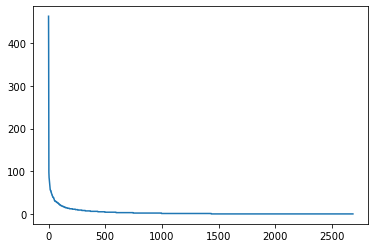

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

# w = [alice_word_count[key] for (key,value) in sorted_word_count] #정렬된 단어 리스트에 대해 빈도수를 가져와서 리스트 생성
w = [alice_word_count[key] for key in sorted_word_count] 
plt.plot(w)   # plot 함수는 (x,y) 값을 모두 주거나 y 값만 줘도 그릴 수 있음. 여기서는 y값에 해당하는 빈도값만 주고 그림.
plt.show()

> 위 그래프에서 상위 몇 개의 단어는 빈도수가 매우 높지만 순위가 100위만 넘어가도 매우 적은 빈도수가 됨  
우리는 글을 쓸 때 자주 사용하는 단어만 주로 쓰는 경향이 있음  

>90%의 단어는 사용 빈도가 비슷한 정도로 낮음 => 소득 순위와 같이 사회 현상에서 많이 발견되는 지프의 법칙(Zipf's Law)   
문서 분류 작업 등 텍스트마이닝 관점에서는 빈도수가 너무 높은 일부 단어들이 미치는 영향을 극복하기 위한 방법 필요

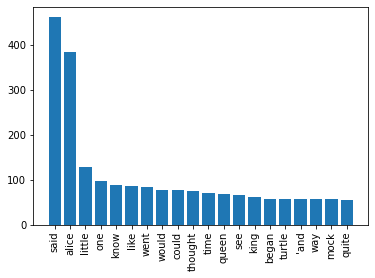

In [23]:
n = sorted_word_count[:20] #빈도수 상위 20개의 단어만 추출
w = [alice_word_count[key] for key in n] #추출된 단어에 대해 빈도를 추출
plt.bar(range(len(n)),w,tick_label=n) #막대그래프를 그림
plt.xticks(rotation=90)
plt.show()

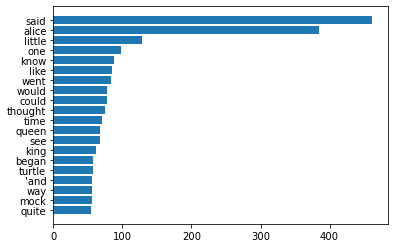

In [24]:
n = sorted_word_count[:20][::-1] #빈도수 상위 20개의 단어를 추출하여 역순으로 정렬
w = [alice_word_count[key] for key in n]
plt.barh(range(len(n)),w,tick_label=n) #수평 막대그래프
plt.show()

## 워드클라우드

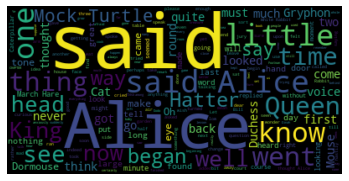

In [44]:
from wordcloud import WordCloud

# Generate a word cloud image
wordcloud = WordCloud().generate(doc_alice)   # 문서를 입력하면 알아서 토큰화 작업 수행 후 워드클라우드 생성 

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear') #이미지를 출력
plt.show()

앞에서 불용어 제거, 특정 품사만 포함하는 등 정제한 키워드들의 빈도 사용  
최대 빈도 키워드의 폰트 크기 설정

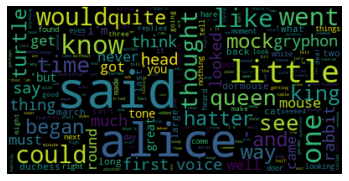

In [46]:
wordcloud = WordCloud(max_font_size=60).generate_from_frequencies(alice_word_count)  # alice_word_count: 소팅 전 딕셔너리
plt.figure()
plt.axis("off")
plt.imshow(wordcloud, interpolation="bilinear")   # Bilinear Interpolation: 새로운 픽셀 값을 거리 비례로 예측하는 기법 
plt.show()

원하는 밑그림의 워드 클라우드

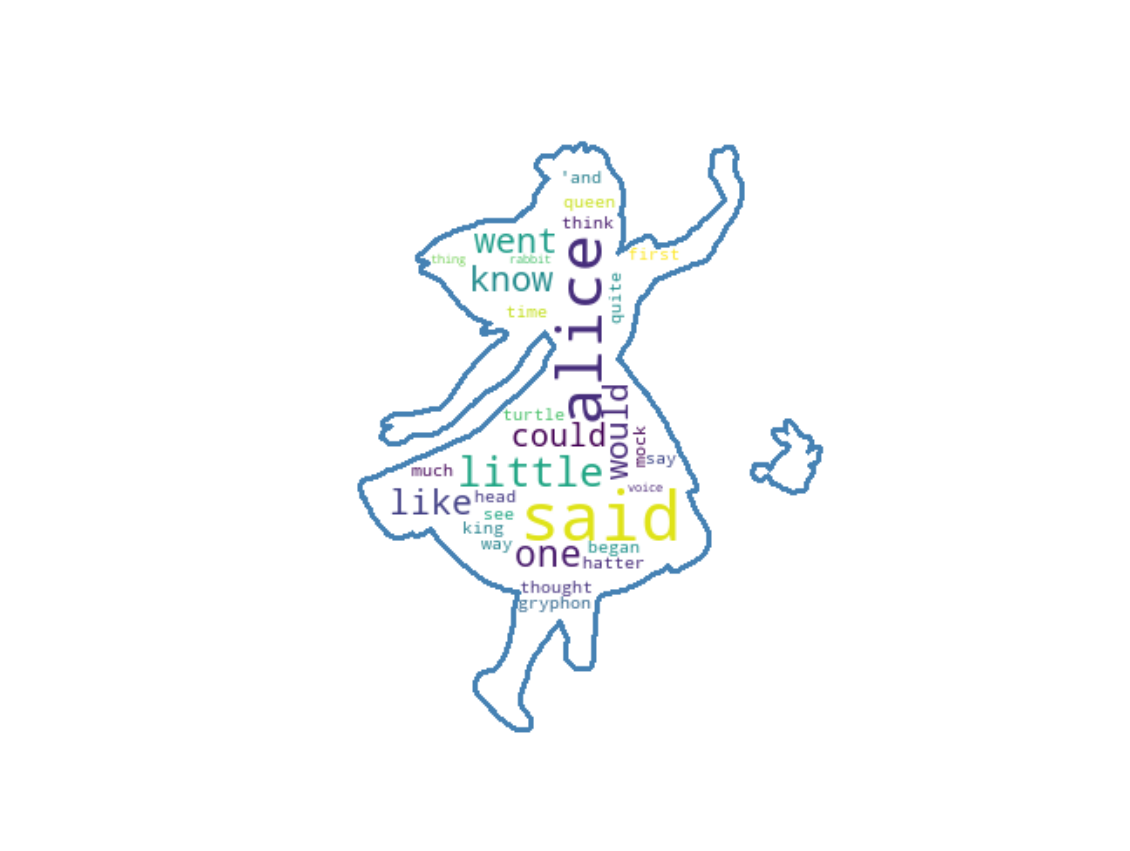

In [56]:
import numpy as np
from PIL import Image

alice_mask = np.array(Image.open("alice_mask.png")) # 배경이미지를 불러와서 numpy array로 변환
wc = WordCloud(background_color="white", # 배경색 지정
               max_words=30, # 출력할 최대 단어 수
               mask=alice_mask, # 배경으로 사용할 이미지
               contour_width=3,  # 테두리선의 크기
               contour_color='steelblue') # 테두리선의 색

wc.generate_from_frequencies(alice_word_count) # 워드 클라우드 생성

wc.to_file("alice.png") # 결과를 이미지 파일로 저장

# 화면에 결과를 출력
# plt.figure()
plt.figure(figsize=(20,30))
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()

## 한국어 문서에 대한 그래프와 워드클라우드
KoNLPy가 제공하는 말뭉치인 대한민국 헌법 텍스트 시각화

In [48]:
from konlpy.corpus import kolaw
const_doc = kolaw.open('constitution.txt').read()

print(type(const_doc)) #가져온 데이터의 type을 확인
print(len(const_doc))
print(const_doc[:600])

<class 'str'>
18884
대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민


In [49]:
from konlpy.tag import Okt
t = Okt()
tokens_const = t.morphs(const_doc) #형태소 단위로 tokenize

print('#토큰의 수:', len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

#토큰의 수: 8796
#앞 100개의 토큰
['대한민국', '헌법', '\n\n', '유구', '한', '역사', '와', '전통', '에', '빛나는', '우리', '대', '한', '국민', '은', '3', '·', '1', '운동', '으로', '건립', '된', '대한민국', '임시정부', '의', '법', '통과', '불의', '에', '항거', '한', '4', '·', '19', '민주', '이념', '을', '계승', '하고', ',', '조국', '의', '민주', '개혁', '과', '평화', '적', '통일', '의', '사명', '에', '입', '각하', '여', '정의', '·', '인도', '와', '동포', '애', '로써', '민족', '의', '단결', '을', '공고', '히', '하고', ',', '모든', '사회', '적', '폐습', '과', '불의', '를', '타파', '하며', ',', '자율', '과', '조화', '를', '바탕', '으로', '자유민주', '적', '기', '본', '질서', '를', '더욱', '확고히', '하여', '정치', '·', '경제', '·', '사회', '·']


의미없어 보이는 키워드들이 혼합되어 있으므로 명사만 추출

In [50]:
tokens_const = t.nouns(const_doc) #형태소 단위로 tokenize 후 명사만 추출
print('#토큰의 수:', len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

#토큰의 수: 3882
#앞 100개의 토큰
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '법', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '입', '각하', '정의', '인도', '동포', '애', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '안', '국민', '생활', '향상', '기하', '밖', '항구', '세계', '평화', '인류', '공영', '이바지', '함', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '것', '다짐', '제정', '차', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '제', '장', '강', '제', '대한민국', '민주공화국', '대한민국']


2개 문자 이상의 키워드들만 추출

In [57]:
tokens_const = [token for token in tokens_const if len(token) > 1]
print('#토큰의 수:', len(tokens_const))
print('#앞 100개의 토큰')
print(tokens_const[:100])

#토큰의 수: 3013
#앞 100개의 토큰
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임시정부', '통과', '불의', '항거', '민주', '이념', '계승', '조국', '민주', '개혁', '평화', '통일', '사명', '각하', '정의', '인도', '동포', '로써', '민족', '단결', '공고', '모든', '사회', '폐습', '불의', '타파', '자율', '조화', '바탕', '자유민주', '질서', '더욱', '정치', '경제', '사회', '문화', '모든', '영역', '각인', '기회', '능력', '최고', '도로', '발휘', '자유', '권리', '책임', '의무', '완수', '국민', '생활', '향상', '기하', '항구', '세계', '평화', '인류', '공영', '이바지', '우리', '우리', '자손', '안전', '자유', '행복', '확보', '다짐', '제정', '개정', '헌법', '이제', '국회', '의결', '국민투표', '개정', '대한민국', '민주공화국', '대한민국', '주권', '국민', '모든', '권력', '국민', '대한민국', '국민', '요건', '법률', '국가', '법률', '재외국민']


matplotlib에서 사용할 한글 폰트 지정(WordCloud 객체는 별도의 폰트를 사용하므로 한글 폰트를 지정하여 WordCloud 객체 생성)  
막대그래프 그리는 부분을 함수화하여 사용  
맥은 아래 코드 중 주석과 같이 설정

[('의원', 21), ('사항', 23), ('및', 25), ('기타', 26), ('위', 36), ('모든', 37), ('바', 37), ('이', 38), ('그', 47), ('헌법', 53), ('때', 55), ('관', 58), ('국민', 61), ('국회', 68), ('국가', 73), ('대통령', 83), ('수', 88), ('정', 89), ('법률', 127), ('제', 175)]


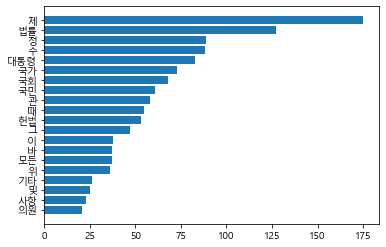

In [51]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

const_cnt = {}
for word in tokens_const:
    const_cnt[word] = const_cnt.get(word, 0) + 1

def word_graph(cnt, max_words=10):
    
    sorted_w = sorted(cnt.items(), key=lambda kv: kv[1])
    print(sorted_w[-max_words:])
    n, w = zip(*sorted_w[-max_words:])

    plt.barh(range(len(n)),w,tick_label=n)
    #plt.savefig('bar.png')  # 필요한 경우, 그래프를 이미지 파일로 저장한다.
    plt.show()

word_graph(const_cnt, max_words=20)

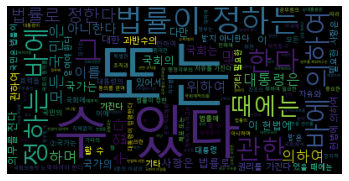

In [52]:
font_path = 'c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path = font_path).generate(const_doc)

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

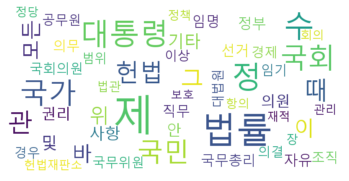

In [53]:
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 100,
    width = 800, #이미지 너비 지정
    height = 400, #이미지 높이 지정
    background_color='white', #이미지 배경색 지정
    max_words=50)

wordcloud.generate_from_frequencies(const_cnt) #원문이 아닌 형태소 분석 결과로부터 워드클라우드를 생성
wordcloud.to_file("const.png") #생성한 이미지를 파일로 저장

plt.axis("off")
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

![](wordcloud.png)